## Анализ номинативных данных. Хи-квадрат критерий
Хи-квадрат критерий - статистический критерий для проверки гипотезы H0,  
что наблюдаемая случайная величина подчиняется некому теоретическому закону распределения (равномерному распределению).

### Задача  
Определить честность монеты (орёл или решка выпадают равновероятно).  
На сколько значимо наблюдаемое (эмпирическое) распределение частот отличается от теоритического.

Имитируем подбрасывание предположительно (на самом деле честной) монетки.

In [1]:
import random as rd

N = 60
expeted_eagles = N / 2
expeted_tails = N / 2

observed_eagles = 0
observed_tails = 0

for i in range(N):
    if rd.randint(0, 1):
        observed_eagles += 1
    else:
        observed_tails += 1

print('observed_eagles:', observed_eagles)
print('observed_tails:', observed_tails)

observed_eagles: 35
observed_tails: 25


H0: Распределение частот выпадения орла и решки абсолютно равномерно.  
P(орла) = 0.5  
P(орла) != 0.5

Расчитываем меру расхождения ожидаемых и наблюдаемых частот - расстояние Пирсона (хи-квадрат).

In [2]:
chi_2 = (observed_eagles - expeted_eagles) ** 2 / expeted_eagles + (observed_tails - expeted_tails) ** 2 / expeted_tails
print('chi_2:', chi_2)

chi_2: 1.6666666666666667


Хи-квадрат, в случае равномерного распределения частот, подчиняется хи-квадрат распределению.

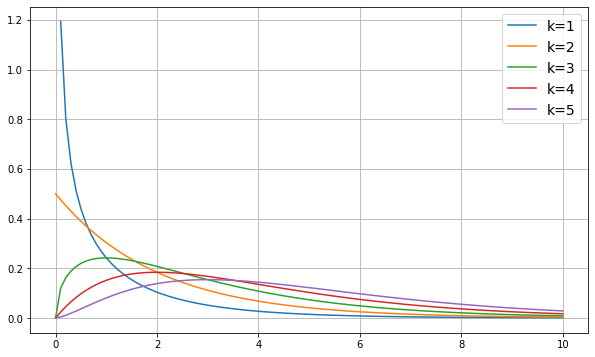

In [3]:
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

df_s = 5

x = np.linspace(0, 10, 100)

for i in range(df_s):
    df = i + 1
    plt.plot(x, st.chi2.pdf(x, df), label=f'k={df}')
plt.legend(bbox_to_anchor=(1, 1), fontsize=14)
plt.grid()
plt.show()

Определяем вероянтность получить такие или ещё более выраженные отклонения используя хи-квадрат распределение.

In [4]:
alpha = 0.05

df = 2 - 1
p_value = 1 - st.chi2.cdf(chi_2, df)
print('p_value:', p_value)

if p_value > alpha:
    print(f'p_value(X > {chi_2:.2f}) > alpha. Do not reject H0')
else:
    print(f'p_value(X > {chi_2:.2f}) < alpha. Reject H0')

p_value: 0.19670560245894686
p_value(X > 1.67) > alpha. Do not reject H0


In [5]:
print(st.chisquare([observed_eagles, observed_tails]))

Power_divergenceResult(statistic=1.6666666666666667, pvalue=0.1967056024589432)


### Задача  
Рассчитайте p-уровень значимости для примера с игральной костью.  
Имеются следующие значения наблюдаемых частот: 10, 10, 10, 5, 10, 15.  
H0: Распределение частот выпадения каждой грани игральной кости абсолютно равномерно.

In [6]:
observed_freq = [10, 10, 10, 5, 10, 15]

chisquare_results = st.chisquare(observed_freq)

chi_2 = chisquare_results.statistic
print('chi_2:', chi_2)

p_value = chisquare_results.pvalue
print('p_value:', p_value)

if p_value > alpha:
    print(f'p_value(X > {chi_2:.2f}) > alpha. Do not reject H0')
else:
    print(f'p_value(X > {chi_2:.2f}) < alpha. Reject H0')

chi_2: 5.0
p_value: 0.4158801869955079
p_value(X > 5.00) > alpha. Do not reject H0


### Задача  
Проверьте гипотезу о том, что в ГС нет никаких различий в предпочтениях трех партий.  
Имеются следующие значения наблюдаемых частот: 10, 30, 50.  

In [7]:
chisquare_results = st.chisquare([10, 30, 50])

chi_2 = chisquare_results.statistic
print('chi_2:', chi_2)

p_value = chisquare_results.pvalue
print('p_value:', p_value)

if p_value > alpha:
    print(f'p_value(X > {chi_2:.2f}) > alpha. Do not reject H0')
else:
    print(f'p_value(X > {chi_2:.2f}) < alpha. Reject H0')

chi_2: 26.666666666666668
p_value: 1.61959679231261e-06
p_value(X > 26.67) < alpha. Reject H0


### Задача  
В 2013 году Эдвард Сноуден передал СМИ секретную информацию АНБ, касающуюся слежки американских спецслужб  
за информационными коммуникациями между гражданами. Однако его поступок вызвал неоднозначную реакцию в обществе.  
Исследовательский центр USA TODAY провел опрос 1500 граждан США с целью выяснить, воспринимают ли они поступок Сноудена  
как положительный или отрицательный. 53% опрошенных респондентов оценили разоблачение положительно.

При помощи теста хи-квадрат проверьте нулевую гипотезу о том,  
что в генеральной совокупности распределение отношения к поступку Сноудена является равномерным, то есть 50 на 50.

In [8]:
N = 1500

chisquare_results = st.chisquare([N * 0.53, N * (1 - 0.53)])

chi_2 = chisquare_results.statistic
print('chi_2:', chi_2)

p_value = chisquare_results.pvalue
print('p_value:', p_value)

if p_value > alpha:
    print(f'p_value(X > {chi_2:.2f}) > alpha. Do not reject H0')
else:
    print(f'p_value(X > {chi_2:.2f}) < alpha. Reject H0')

chi_2: 5.4
p_value: 0.02013675155034633
p_value(X > 5.40) < alpha. Reject H0
